<h1>
  <center><strong>MovieLens Exploratory Data Analysis (EDA)</strong></center>
</h1>

---
<br>

I used the **MovieLens** dataset for Exploratory Data Analysis. The dataset available on [MovieLens](https://grouplens.org/datasets/movielens/).It contains 32,000,000 ratings and 2,000,000 tag applications across 87,585 movies. These data were created by 200,948 users between January 1995 and October 2023. This stable benchmark dataset was generated in October 2023 and released in May 2024.


The data are contained in the files *genome-scores.csv, genome-tags.csv, links.csv, movies.csv, ratings.csv and tags.csv*. I only use **movie.csv** and **rating.csv**.




<h2>
  This Notebook Cover This Questions:
</h2>

<h3>Movie CSV</h3>

1.   [Find the number of released movies for each year](#movie_q1)
2.   [Find the number of movies released in last 15 years.](#movie_q2)
3.   [Find the number of movies released in different genres last 10 years.](#movie_q3)
4.   [Genres in Movies](#movie_q4)
5.   [Show Percantage of Genres.](#movie_q5)
6.   [Find the 5 years in which the most movies were released and list their genres for each year](#movie_q6)


<h3>Rating CSV</h3>

1.  [Total Number of Per Rating](#rating_q1)
2.  [Find the counts of ratings for each year](#rating_q2)
3.  [Find the counts of ratings per month](#rating_q3)
4.  [Find top 10 users based on counts of ratings. Visualize it.](#rating_q4)
5.  [Count of unique users per year](#rating_q5)
6.  [Find the 10 Rated Movies and Counts](#rating_q6)
7.  [Top 10 Movies by Overall Rating (Sum of Rating/count of rating)](#rating_q7)
8.  [Top 10 Movies by Overall Rating (With over 500 ratings count)](#rating_q8)


### **Import Libraries**

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

### **Movie CSV**

In [ ]:
movie_df = pd.read_csv('/content/movies.csv')
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_df.tail()

,movieId,title,genres
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama
87584,292757,Race to the Summit (2023),Action|Adventure|Documentary


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
print(f"Shape : {movie_df.shape} \nSize  :  {movie_df.size}")

Shape : (87585, 3) 
Size  :  262755


In [ ]:
movie_df.sample(5)

,movieId,title,genres
28585,131794,Monster High (1989),Comedy|Horror|Sci-Fi
40362,158416,Crazy Wisdom (2011),Documentary
62470,205525,The Odd Way Home (2013),Drama
64583,210671,The Last Train (2006),Drama|War
22002,113048,Tables Turned on the Gardener (1895),Comedy


In [ ]:
movie_df.isnull().sum()

,0
movieId,0
title,0
genres,0


In [ ]:
movie_df.nunique()

,0
movieId,87585
title,87382
genres,1798


In [ ]:
movie_df.isna().sum()
#movie_df.dropna( )

,0
movieId,0
title,0
genres,0


In [ ]:
movie_df.duplicated().sum()

np.int64(0)

In [ ]:
movie_df.index

RangeIndex(start=0, stop=87585, step=1)

In [ ]:
def preprocess_movie_csv(movie_df):

  '''
   Extract years by finding 4 consecutive numbers. (d+ does not work properly if you have numbers in title)
   Find all  unique genres
  '''

  df = movie_df.copy()
  df['release_year'] = df.title.str.extract("\((\d{4})\)", expand=True).astype(str)
  df['title'] = df.title.str[:-7]
  df = df.join(df['genres'].str.get_dummies().astype(bool))
  df.drop('genres', inplace=True, axis=1)
  return df

<>:9: SyntaxWarning: invalid escape sequence '\('
<>:9: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-1448053190.py:9: SyntaxWarning: invalid escape sequence '\('
  df['release_year'] = df.title.str.extract("\((\d{4})\)", expand=True).astype(str)


In [ ]:
processed_movie_df = preprocess_movie_csv(movie_df)
processed_movie_df.rename(columns={"(no genres listed)": "No Genre"}, inplace=True)
processed_movie_df

,movieId,title,release_year,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,292731,The Monroy Affaire,2022,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87581,292737,Shelter in Solitude,2023,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
87582,292753,Orca,2023,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87583,292755,The Angry Breed,1968,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_movie_titles = processed_movie_df[['movieId','title']]
df_movie_titles

,movieId,title
0,1,Toy Story
1,2,Jumanji
2,3,Grumpier Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II
...,...,...
87580,292731,The Monroy Affaire
87581,292737,Shelter in Solitude
87582,292753,Orca
87583,292755,The Angry Breed


<a name='movie_q1'></a>
### **1. Find the number of released movies for each year**

In [ ]:
years = processed_movie_df.release_year.unique()
years.sort()
print(years)

['1874' '1878' '1880' '1882' '1883' '1885' '1887' '1888' '1889' '1890'
 '1891' '1892' '1894' '1895' '1896' '1897' '1898' '1899' '1900' '1901'
 '1902' '1903' '1904' '1905' '1906' '1907' '1908' '1909' '1910' '1911'
 '1912' '1913' '1914' '1915' '1916' '1917' '1918' '1919' '1920' '1921'
 '1922' '1923' '1924' '1925' '1926' '1927' '1928' '1929' '1930' '1931'
 '1932' '1933' '1934' '1935' '1936' '1937' '1938' '1939' '1940' '1941'
 '1942' '1943' '1944' '1945' '1946' '1947' '1948' '1949' '1950' '1951'
 '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960' '1961'
 '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971'
 '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981'
 '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991'
 '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001'
 '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011'
 '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021'
 '2022

<Axes: title={'center': 'Number of movies released per year'}, xlabel='release_year'>

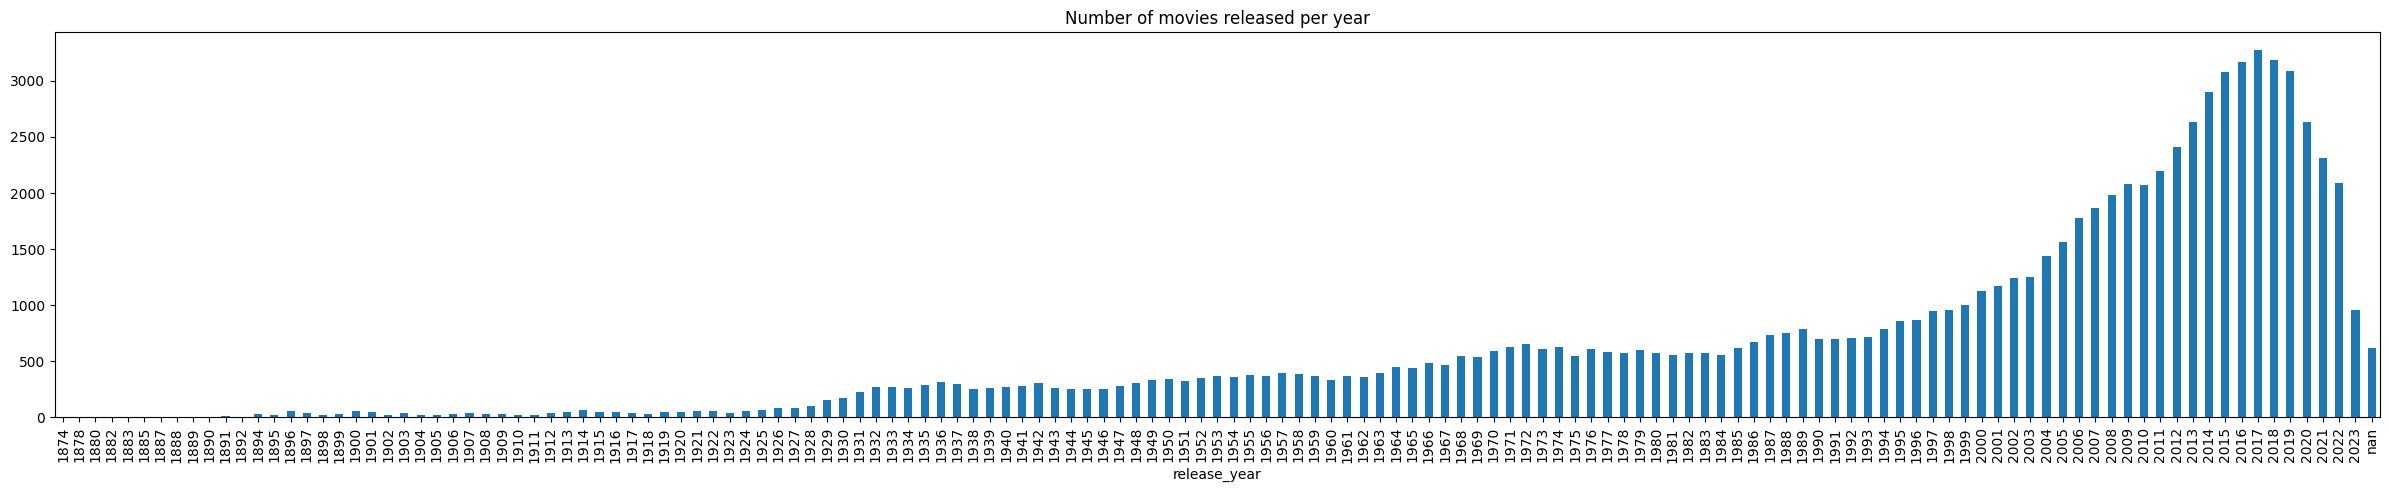

In [ ]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count()
df_temp.plot.bar(x='year', y='movies', title='Number of movies released per year', figsize=(30, 5))

<a name='movie_q2'></a>

###**2. Find the number of movies released in last 15 years.**

/tmp/ipython-input-2583456986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=df_temp.index,y=df_temp.values, palette='rainbow')


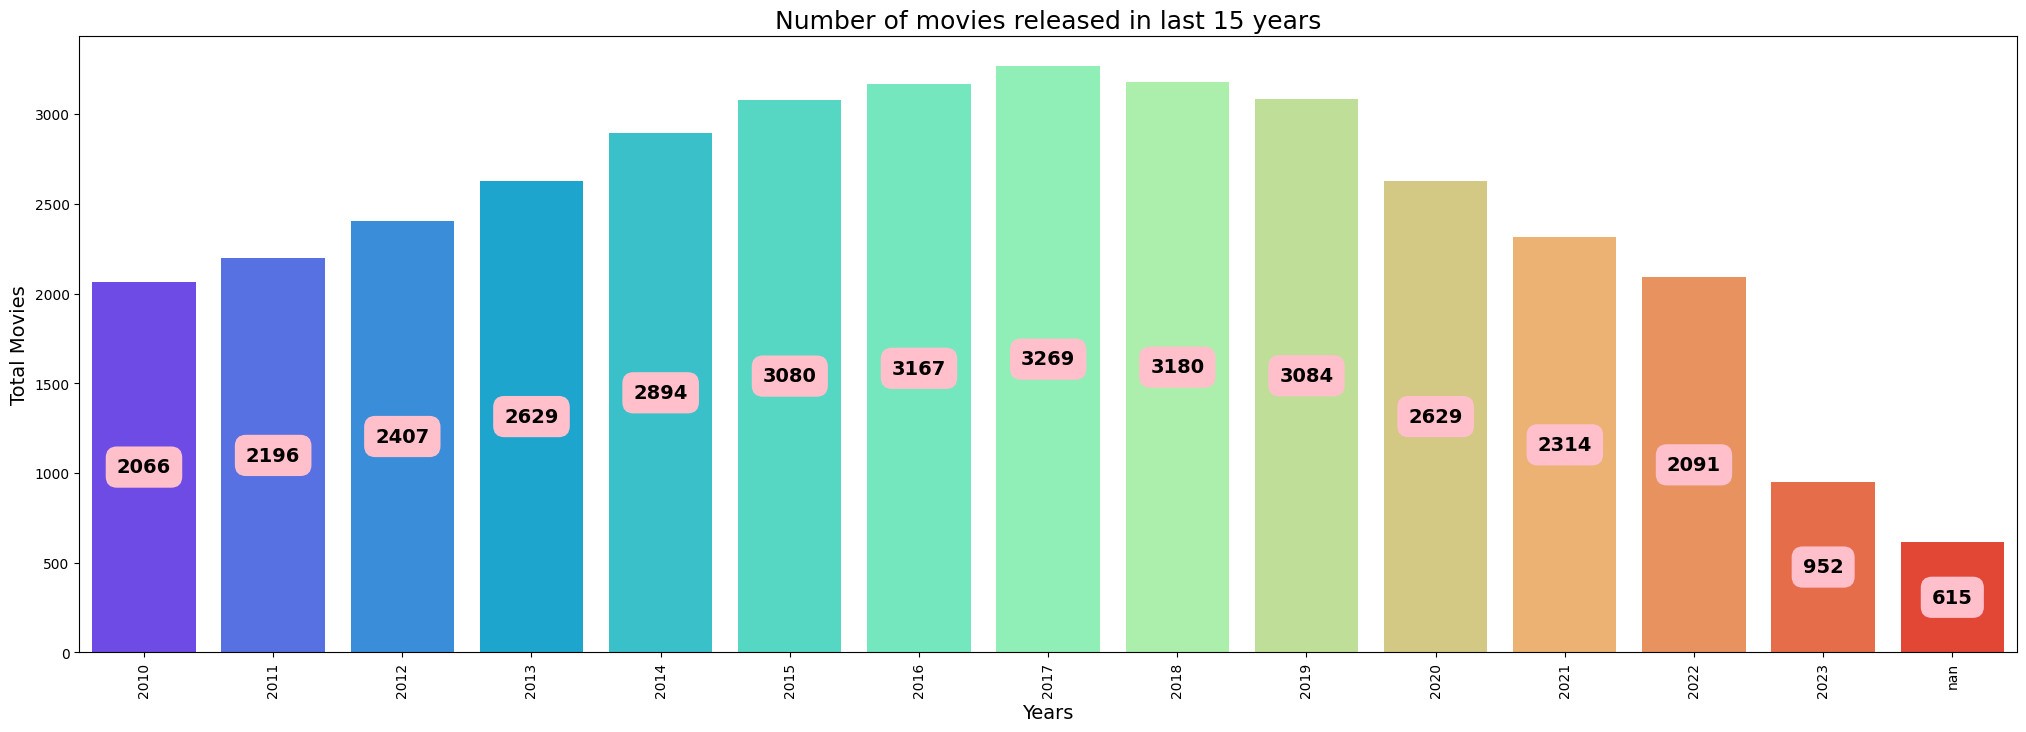

In [ ]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count().tail(15)
plt.figure(figsize=(25,8))
ax= sns.barplot(x=df_temp.index,y=df_temp.values, palette='rainbow')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()),
            ha = 'center', va='center', size = 14, weight = 'bold', rotation = 0, color = 'black',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.xlabel('Years',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Total Movies',fontsize=14)
plt.title("Number of movies released in last 15 years", fontsize=18)
plt.show()

<a name='movie_q3'></a>
###**3. Find the number of movies released in different genres last 10 years.**

In [ ]:
genres_unique = pd.DataFrame(pd.DataFrame(movie_df.genres.str.split('|').tolist()).stack().unique(), columns=['genre'])
genres_unique[-1:]= "No Genre"
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


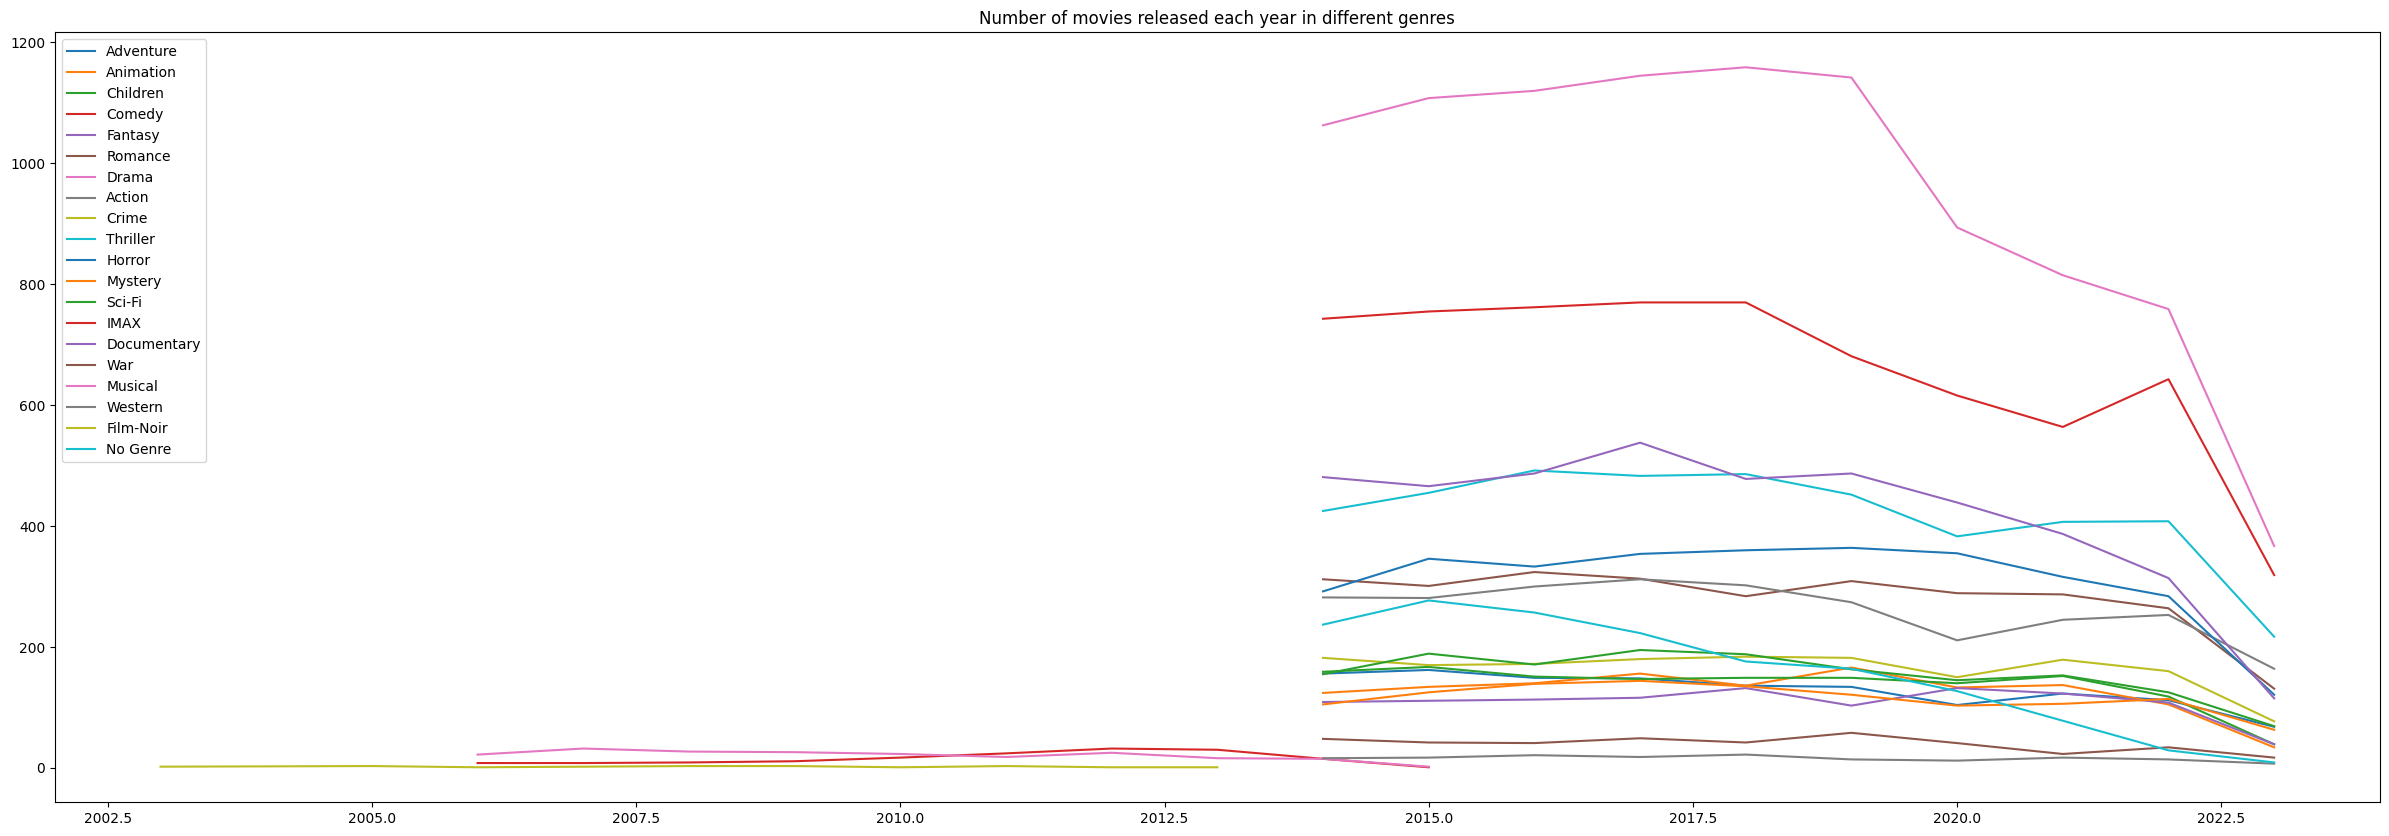

In [ ]:
plt.figure(figsize=(30,10))
for genre in genres_unique.genre:
    df_temp = processed_movie_df[processed_movie_df[genre]==True][['release_year', 'movieId']]

    #fill na with mean of the years
    df_temp['release_year'] = pd.to_numeric(df_temp['release_year'], errors='coerce')
    df_temp['release_year'] = df_temp['release_year'].fillna(int(df_temp['release_year'].mean()))
    df_temp['release_year'] =df_temp['release_year'].astype(int)
    df_temp = df_temp.groupby(['release_year']).count().reset_index().tail(10)
    plt.plot(df_temp['release_year'], df_temp['movieId'], label=genre)
plt.title('Number of movies released each year in different genres')
plt.legend()
plt.show()

<a name='movie_q4'></a>
### **4. Genres in Movies**

/tmp/ipython-input-3593042137.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)


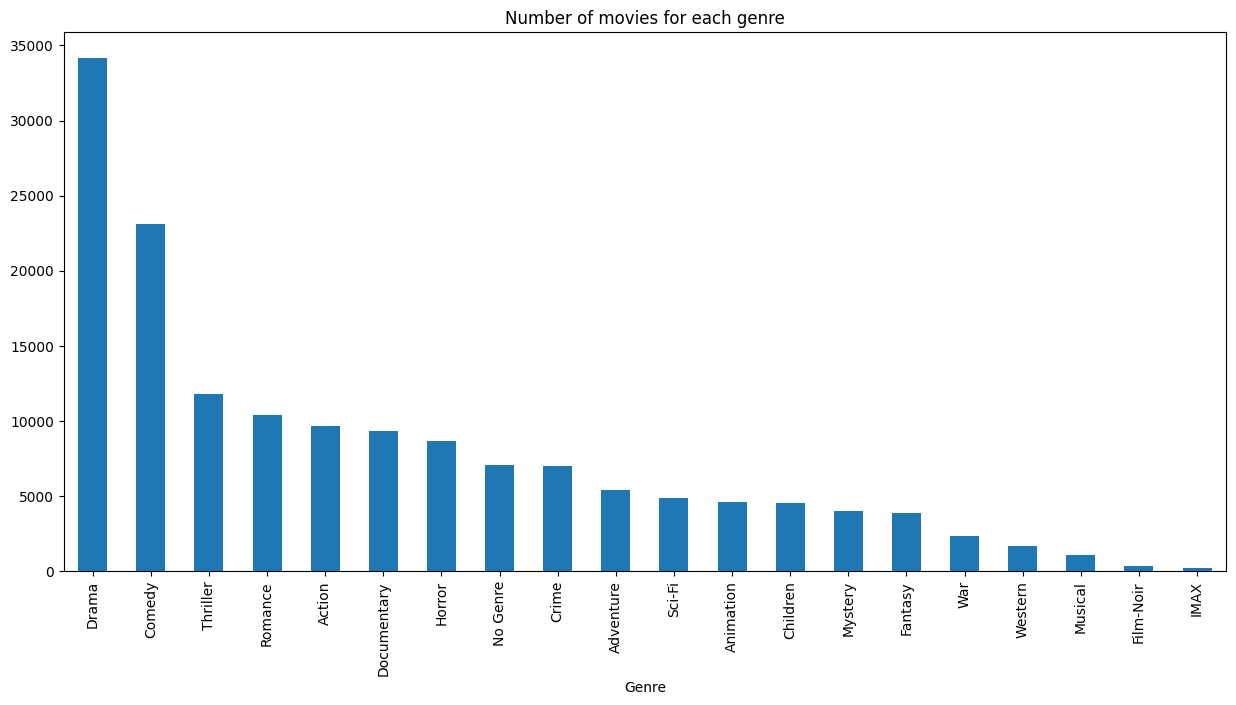

In [ ]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique.genre:
    row = [genre, processed_movie_df[processed_movie_df[genre]==True][['movieId']].count()]
    df_genres.loc[len(df_genres)] = row

df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)
df_genres = df_genres.sort_values('num_movies', ascending=False).set_index('genre')
plot_fig = df_genres['num_movies'].plot(kind='bar', figsize=(15,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('Genre');

<a name='movie_q5'></a>
### **5. Show Percentage of Genres**

/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:3333: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = np.asarray(x, np.float32)


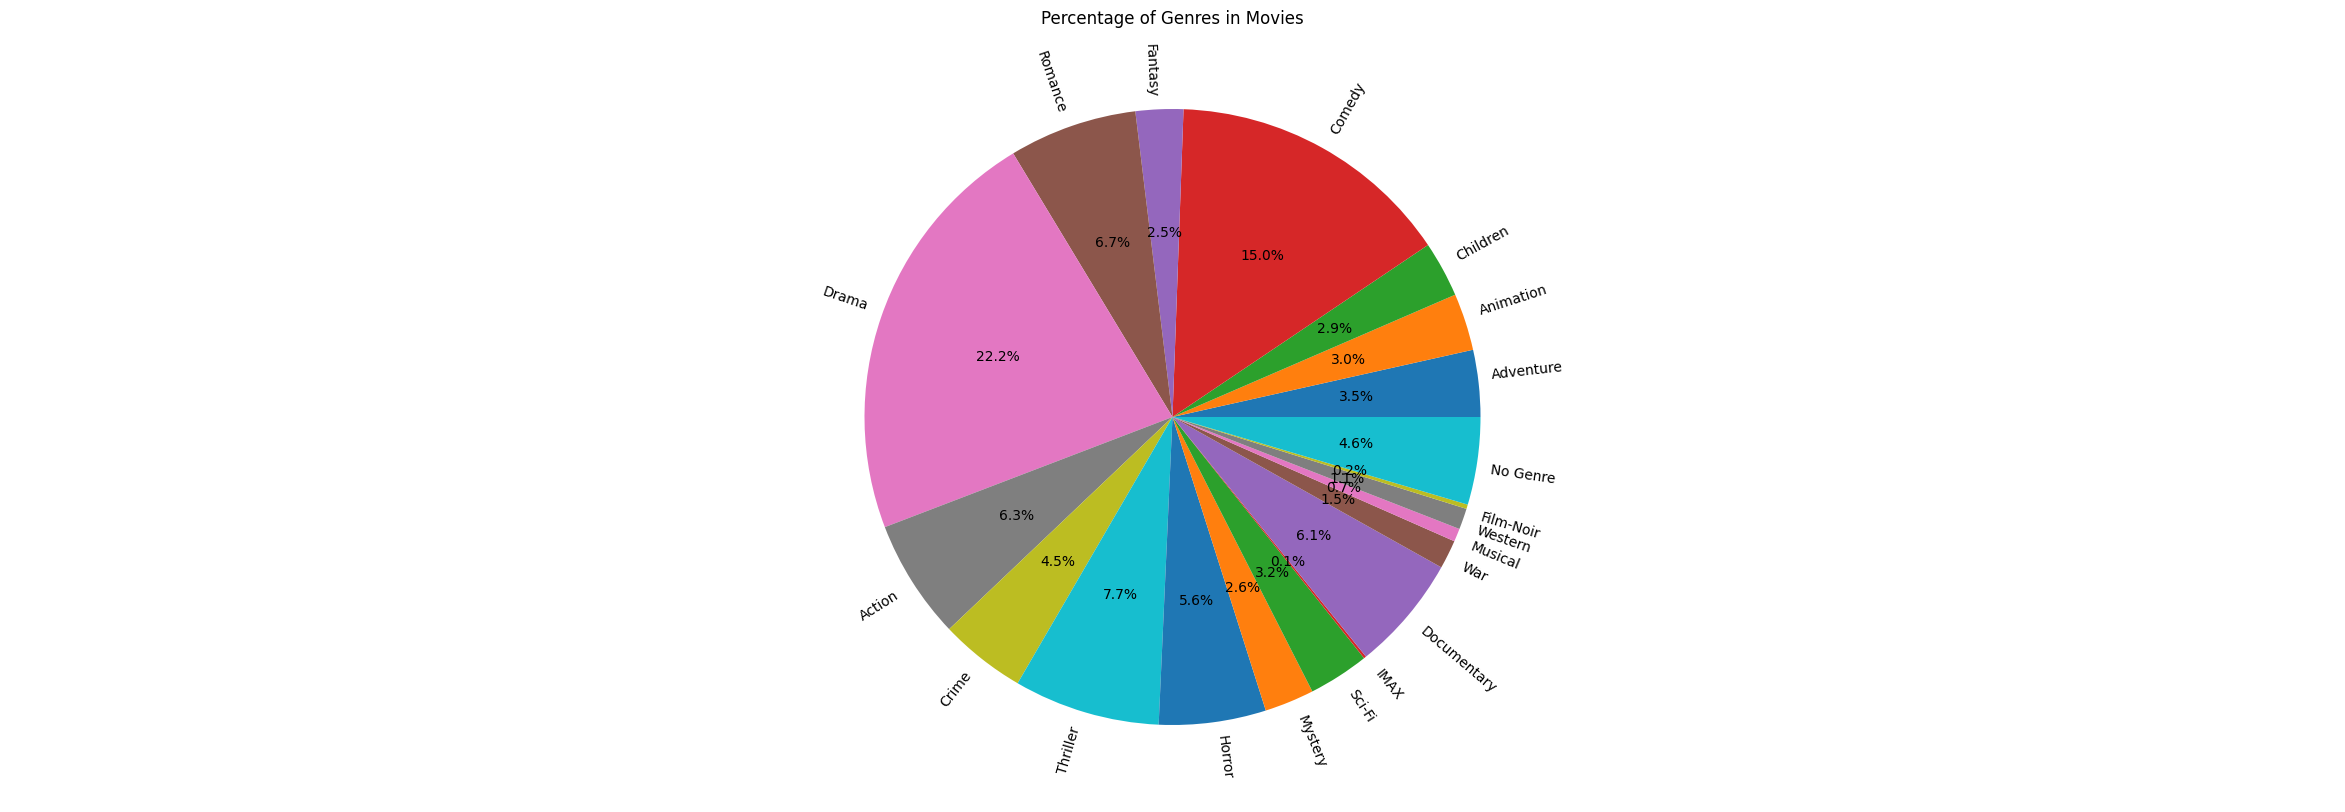

In [ ]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique.genre:
    row = [genre, processed_movie_df[processed_movie_df[genre]==True][['movieId']].count()]
    df_genres.loc[len(df_genres)] = row
plt.figure(figsize=(30,10))
plt.axis('equal');
plt.pie(df_genres['num_movies'], labels=df_genres['genre'], autopct='%.1f%%', labeldistance=1.04, rotatelabels=True)
plt.title("Percentage of Genres in Movies")
plt.show()

<a name='movie_q6'></a>
### **6. Find the 5 years in which the most movies were released and list their genres for each year**

In [ ]:
#%%
df_temp = processed_movie_df.groupby(['release_year'])['title'].count().nlargest(5)
print(df_temp.index.values)

['2017' '2018' '2016' '2019' '2015']


In [ ]:
top_years = processed_movie_df[processed_movie_df["release_year"].isin(df_temp.index)].sort_values(by='release_year', ascending=False).reset_index()

# Get the list of all genre columns from processed_movie_df
genre_columns = [col for col in processed_movie_df.columns if col not in ['movieId', 'title', 'release_year']]

# Group by release_year and sum the genre columns to get movie counts per genre for each year
genres_per_top_year = top_years.groupby('release_year')[genre_columns].sum()

# Display the results
print("Genres for the 5 years with the most movie releases:")
print(genres_per_top_year)

Genres for the 5 years with the most movie releases:
              No Genre  Action  Adventure  Animation  Children  Comedy  Crime  \
release_year                                                                    
2015               277     281        162        134       167     755    170   
2016               257     300        149        140       151     762    172   
2017               223     312        148        156       147     770    180   
2018               176     302        136        136       149     770    184   
2019               164     274        134        166       149     681    182   

              Documentary  Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  \
release_year                                                                  
2015                  466   1108      111          0     346     1        2   
2016                  487   1120      113          0     333     0        0   
2017                  538   1145      116          0     354   

In [ ]:
df_genres = pd.DataFrame(columns=['year','genre', 'num_movies'])

for i in range(len(df_temp)):
  for genre in genres_unique.genre:
      df_year = top_years[top_years['release_year'].astype(int)==int(df_temp.index[i])]
      row = [df_temp.index[i], genre, df_year[df_year[genre]==True][['movieId']].count()]
      df_genres.loc[len(df_genres)] = row

df_genres['year'] = df_genres['year'].astype(np.int32)
df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)
df_genres = df_genres.sort_values('num_movies', ascending=False)


/tmp/ipython-input-57723919.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)


In [ ]:
df_genres =df_genres.sort_values(by=['year'])

/tmp/ipython-input-2499445538.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x = df_genres['year'],


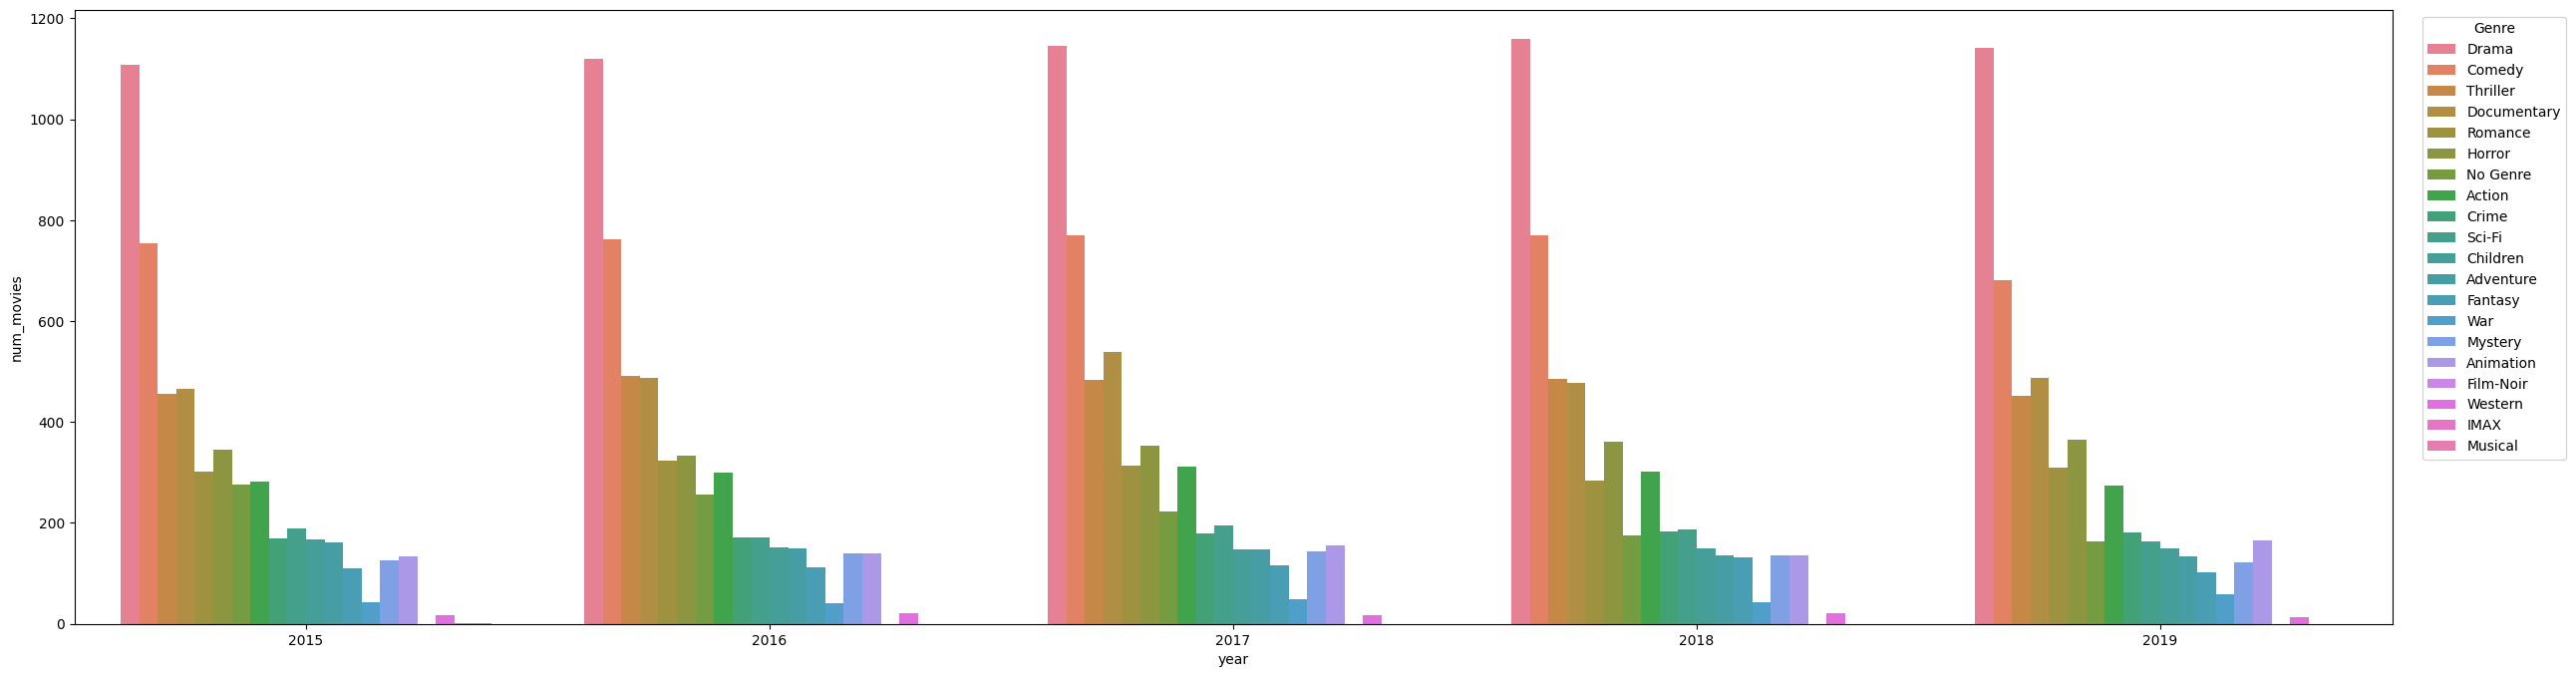

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x = df_genres['year'],
            y = df_genres["num_movies"],
            hue= df_genres["genre"],
            errwidth=0)
#for i in ax.containers:
#    ax.bar_label(i,)

plt.legend(title='Genre', bbox_to_anchor=(1.01, 1), loc='upper left');

## **Rating CSV**

In [ ]:
df_rating = pd.read_csv('/content/ratings.csv')

In [ ]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [ ]:
df_rating.tail()

,userId,movieId,rating,timestamp
13639269,85271,1653,3.0,1078003855
13639270,85271,1674,4.5,1078003880
13639271,85271,1701,4.0,1078002055
13639272,85271,1704,4.0,1078001332
13639273,85271,1711,4.0,107


In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13639274 entries, 0 to 13639273
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 416.2 MB


In [ ]:
print(f"Shape : {df_rating.shape} \nSize  :  {df_rating.size}")

Shape : (13639274, 4) 
Size  :  54557096


In [ ]:
df_rating.sample(5)

,userId,movieId,rating,timestamp
9620859,60125,8969,1.0,1252162876
13408253,83817,110102,4.5,1566972106
4883851,30506,5445,4.5,1596993617
8507338,53249,47,4.5,1154880946
10571212,66231,5956,4.5,1100922152


In [ ]:
df_rating.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
df_rating.isna().sum()
#movie_df.dropna( )

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
df_rating.nunique()

,0
userId,85271
movieId,66656
rating,10
timestamp,11230015


In [ ]:
df_rating.duplicated().sum()

np.int64(0)

In [ ]:
df_rating["timestamp"] = pd.to_datetime(df_rating["timestamp"], unit='s', errors='coerce')
df_rating.dropna(subset=['timestamp'], inplace=True)
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['time'] = df_rating['timestamp'].dt.time
df_rating['date'] = df_rating['timestamp'].dt.date

In [ ]:
df_rating

,userId,movieId,rating,timestamp,year,month,time,date
0,1,17,4.0,1999-12-03 19:24:37,1999,12,19:24:37,1999-12-03
1,1,25,1.0,1999-12-03 19:43:48,1999,12,19:43:48,1999-12-03
2,1,29,2.0,1999-11-22 00:36:16,1999,11,00:36:16,1999-11-22
3,1,30,5.0,1999-12-03 19:24:37,1999,12,19:24:37,1999-12-03
4,1,32,5.0,1999-11-22 00:00:58,1999,11,00:00:58,1999-11-22
...,...,...,...,...,...,...,...,...
13639269,85271,1653,3.0,2004-02-28 21:30:55,2004,2,21:30:55,2004-02-28
13639270,85271,1674,4.5,2004-02-28 21:31:20,2004,2,21:31:20,2004-02-28
13639271,85271,1701,4.0,2004-02-28 21:00:55,2004,2,21:00:55,2004-02-28
13639272,85271,1704,4.0,2004-02-28 20:48:52,2004,2,20:48:52,2004-02-28


In [ ]:
#%%
print('Years :          ', df_rating.year.unique())
print('Months :         ', df_rating.month.unique())
print('Unique ratings : ', df_rating.rating.unique())
print('Average rating : ', round(df_rating.rating.mean(), 2))
print('Frequency of each rating value:\n',df_rating['rating'].value_counts())

Years :           [1999 1996 2004 2000 2019 2006 2007 2008 2009 2010 2015 2013 2017 2012
 2014 2011 2016 2001 2018 2002 1998 2021 2020 2022 2023 2003 2005 1997
 1995 1970]
Months :          [12 11  7  5  6  8  3  2  1  4  9 10]
Unique ratings :  [4.  1.  2.  5.  3.  3.5 0.5 4.5 2.5 1.5]
Average rating :  3.54
Frequency of each rating value:
 rating
4.0    3559959
3.0    2588811
5.0    1955972
3.5    1817049
4.5    1261381
2.0     873347
2.5     718861
1.0     410114
0.5     227016
1.5     226764
Name: count, dtype: int64


In [ ]:
df = df_rating.sort_values('movieId')

In [ ]:
df_ratings = df.merge(df_movie_titles, left_on='movieId', right_on='movieId', how='left')

<a name='rating_q1'></a>
### **1. Total Number of Per Rating**

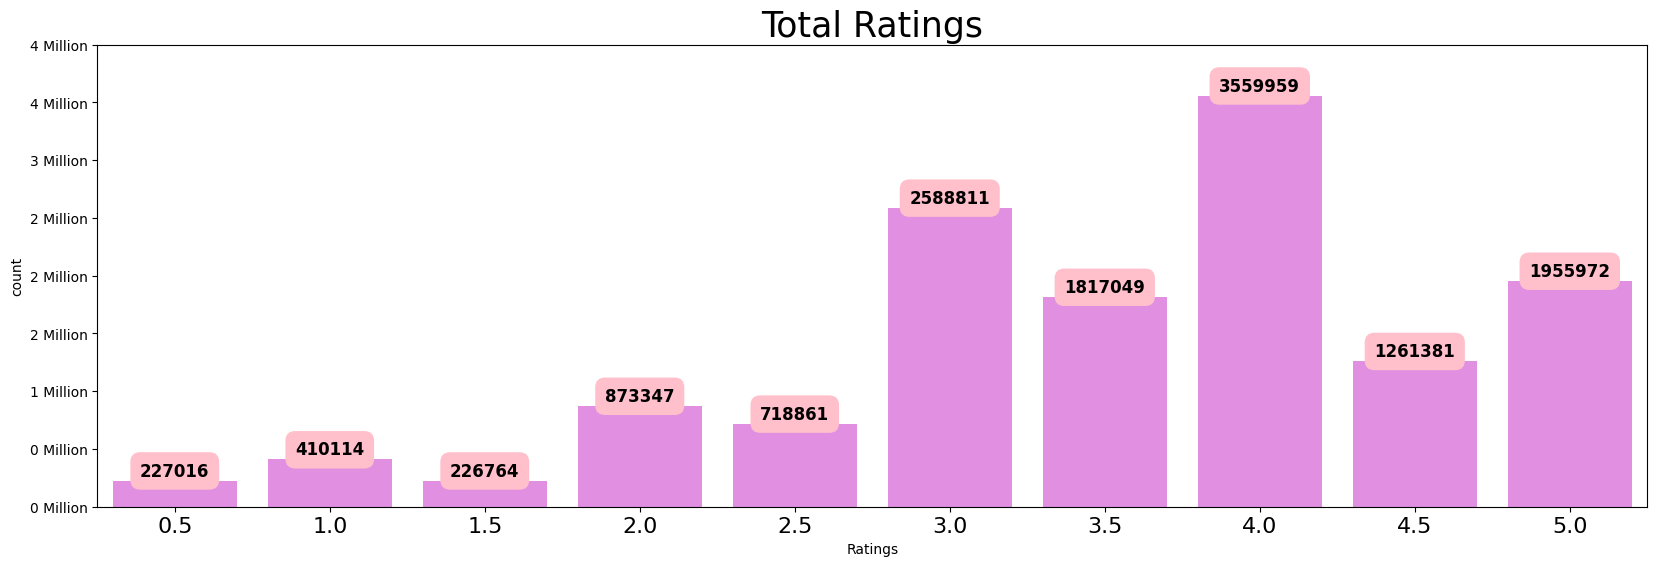

In [ ]:
plt.figure(figsize= (20, 6))

ax = sns.countplot(data = df_ratings, x ="rating",
            color = 'violet')

# Adjust y-axis limit to better fit the data and improve visibility
ax.set_ylim(0, 4000000)

tick_locs = ax.get_yticks()
ax.set_yticks(tick_locs)
ylabels = ['{:.0f}'.format(x/1000000) + ' Million' for x in tick_locs]
ax.set_yticklabels(ylabels)

for i in ax.patches:
    # Change label color to black and position at the top of the bar
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height() + 5000, # Added some padding to y-position
            s = int(i.get_height()),
            ha = 'center', va ='bottom', size = 12, weight = 'bold', rotation = 0, color = 'black',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))

plt.title('Total Ratings', size= 25)
plt.xlabel("Ratings")
plt.xticks(size= 16)

plt.show()

<a name='rating_q2'></a>

### **2. Find the counts of ratings for each year**

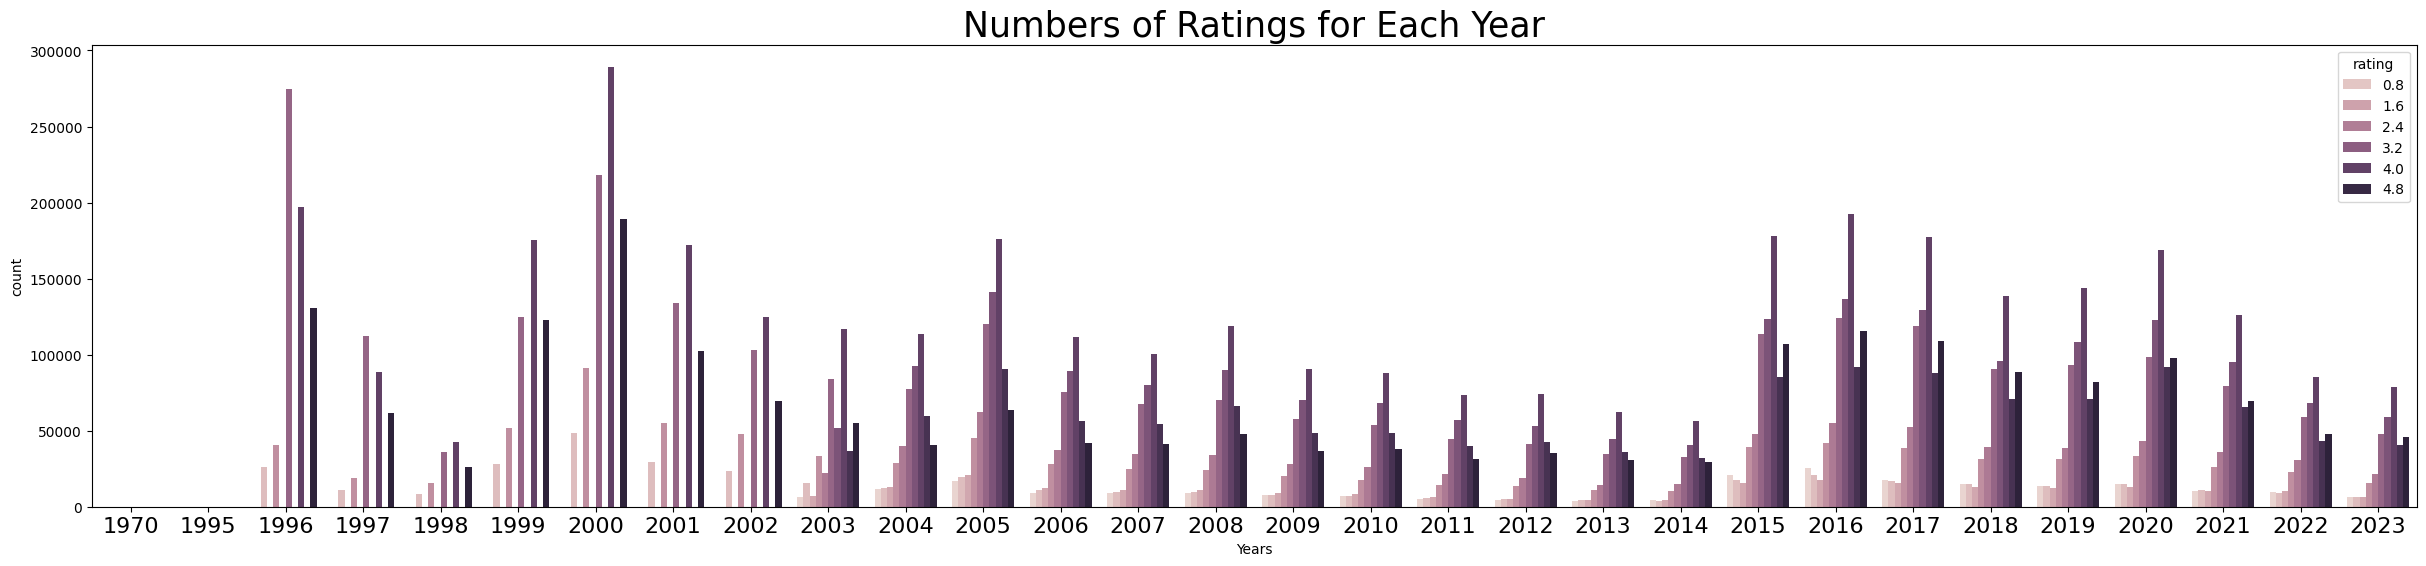

In [ ]:
plt.figure(figsize= (30, 6))

sns.countplot(data = df_ratings, x=df_ratings.year,
              hue= df_ratings.rating)

plt.title('Numbers of Ratings for Each Year', size= 25)
plt.xlabel("Years")
plt.xticks(size= 16)

plt.show()

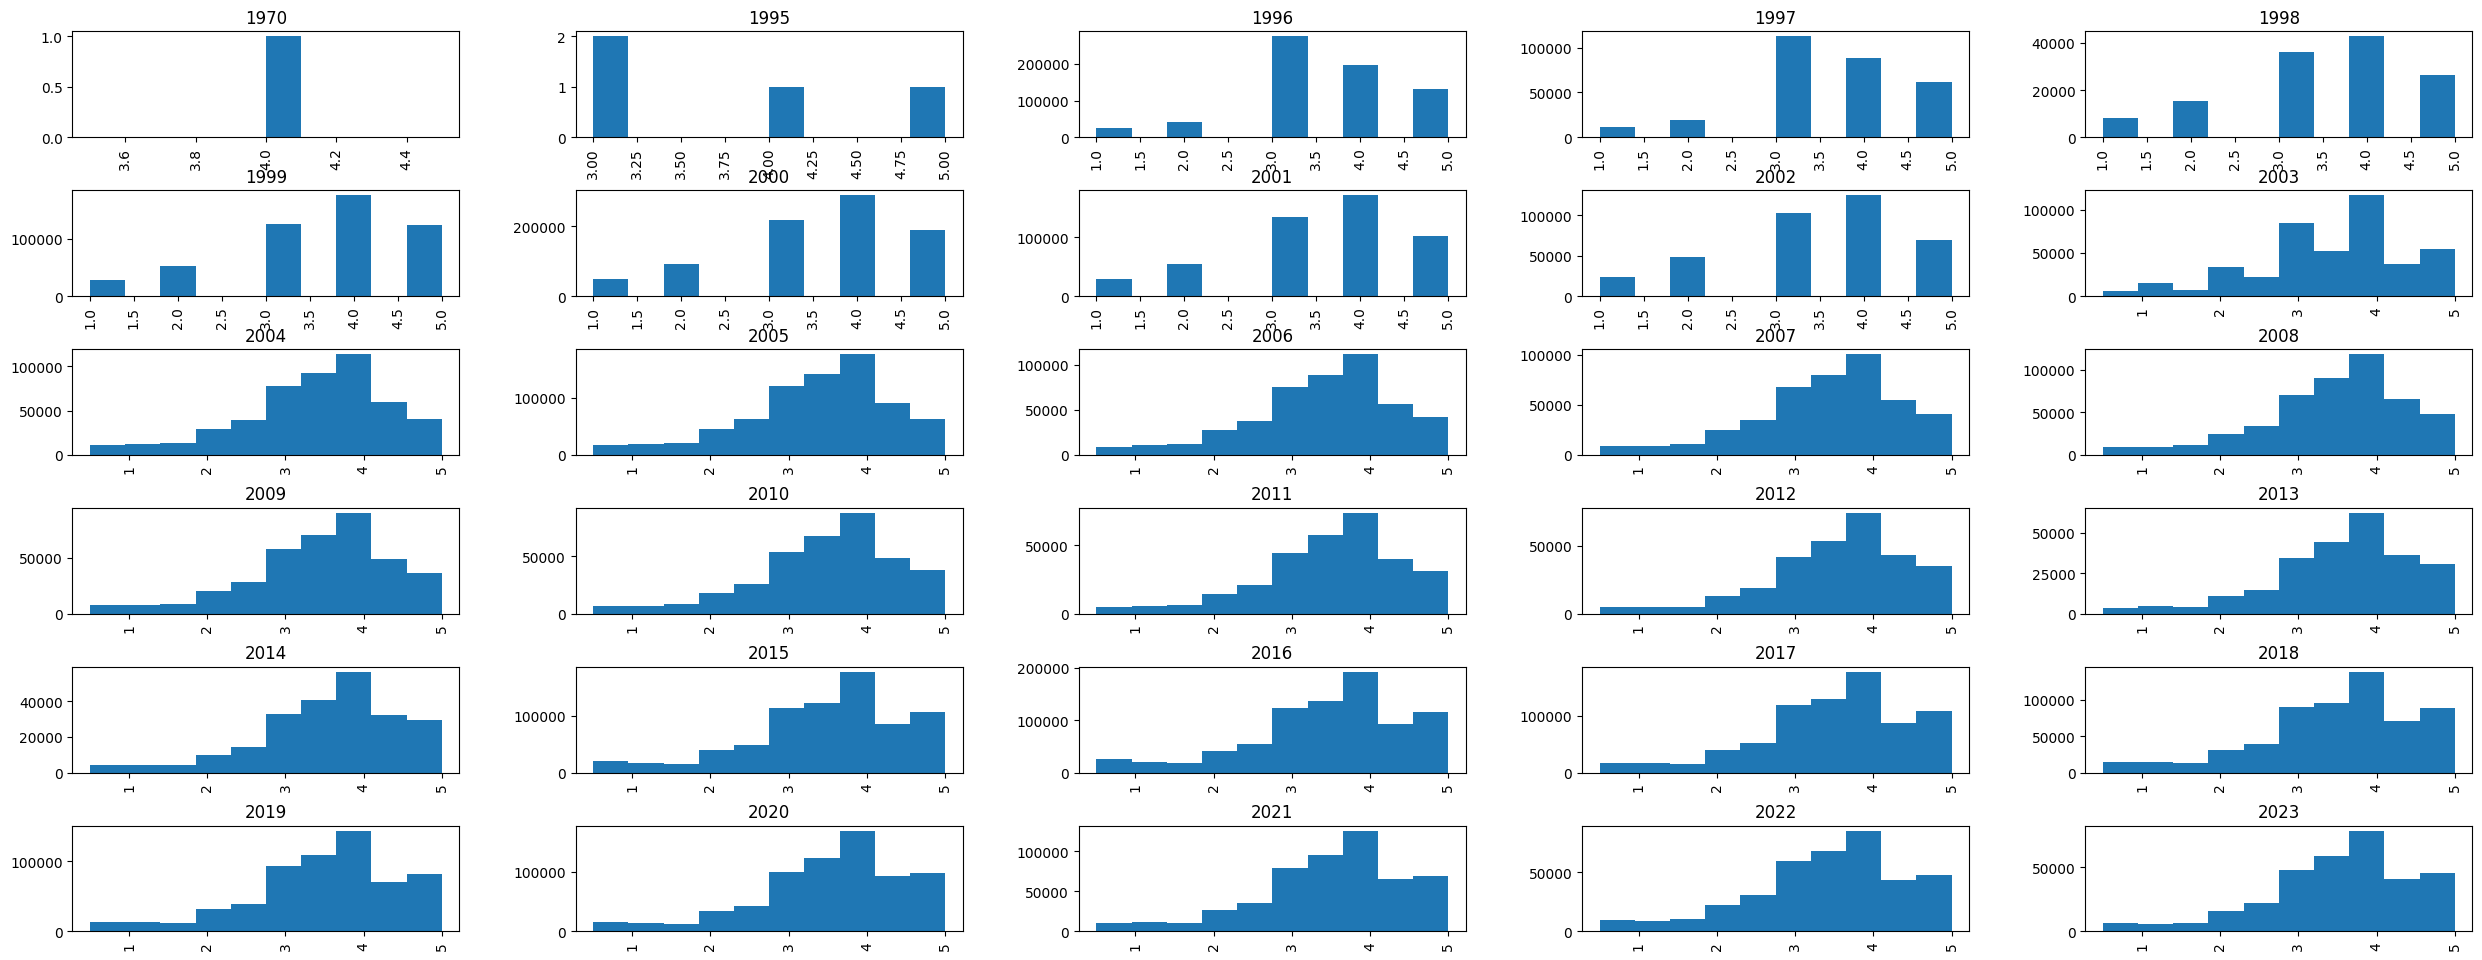

In [ ]:
df_ratings['rating'].hist(by=df_ratings['year'], figsize=(30, 12));

<a name='rating_q3'></a>

### **3. Find the counts of ratings per month**

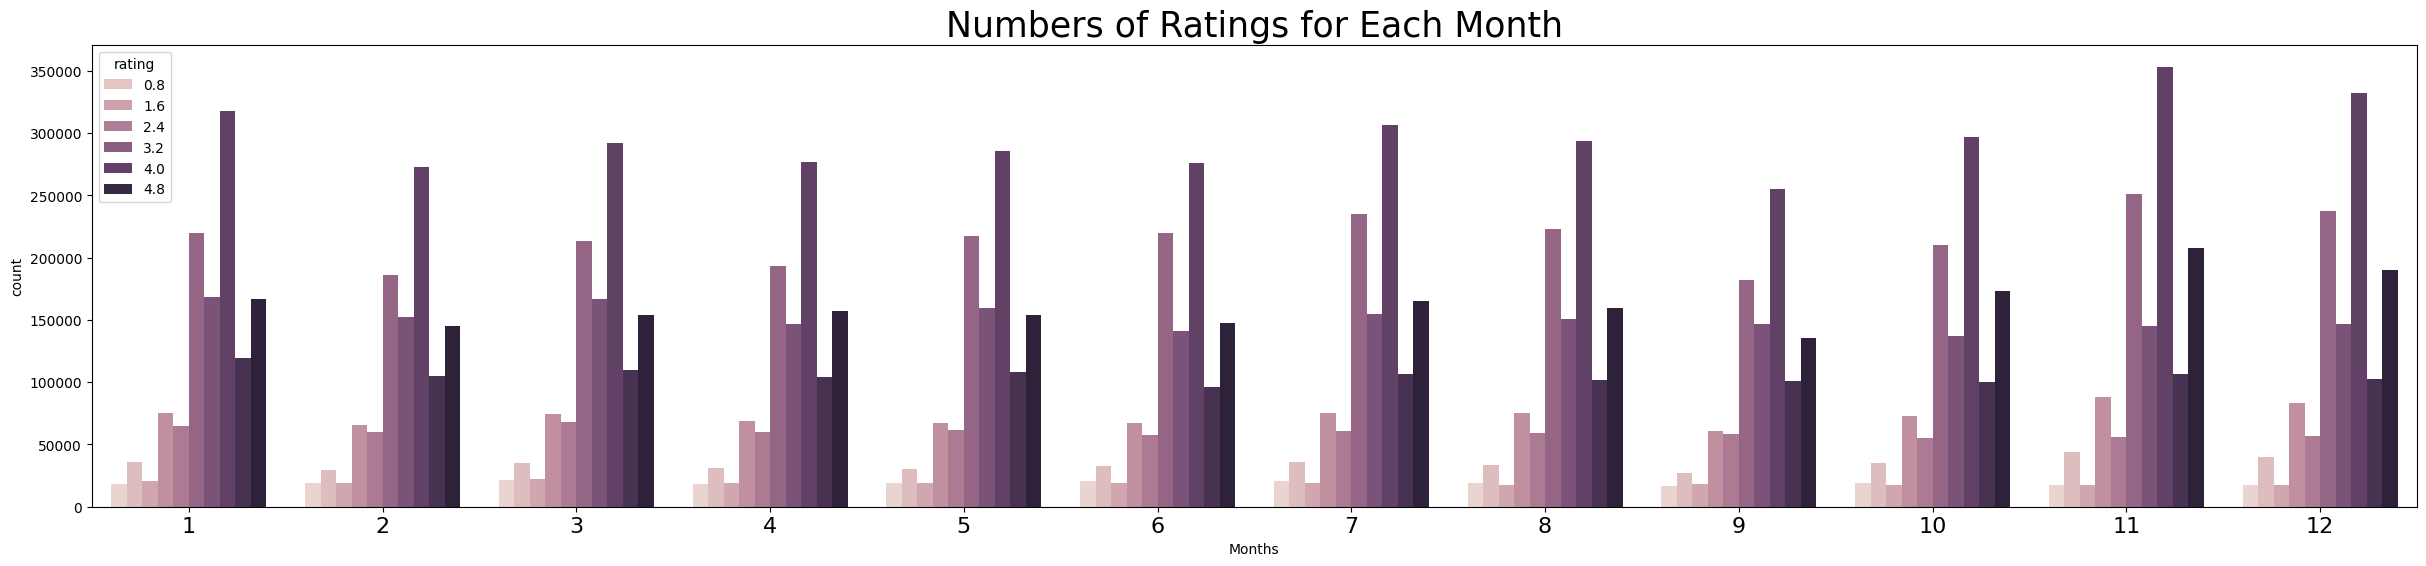

In [ ]:
plt.figure(figsize= (30, 6))

sns.countplot(data = df_ratings, x=df_ratings.month,
              hue= df_ratings.rating)

plt.title('Numbers of Ratings for Each Month', size= 25)
plt.xlabel("Months")
plt.xticks(size= 16)
plt.show()

<a name='rating_q4'></a>

### **4. Find top 10 users based on counts of ratings. Visualize it.**

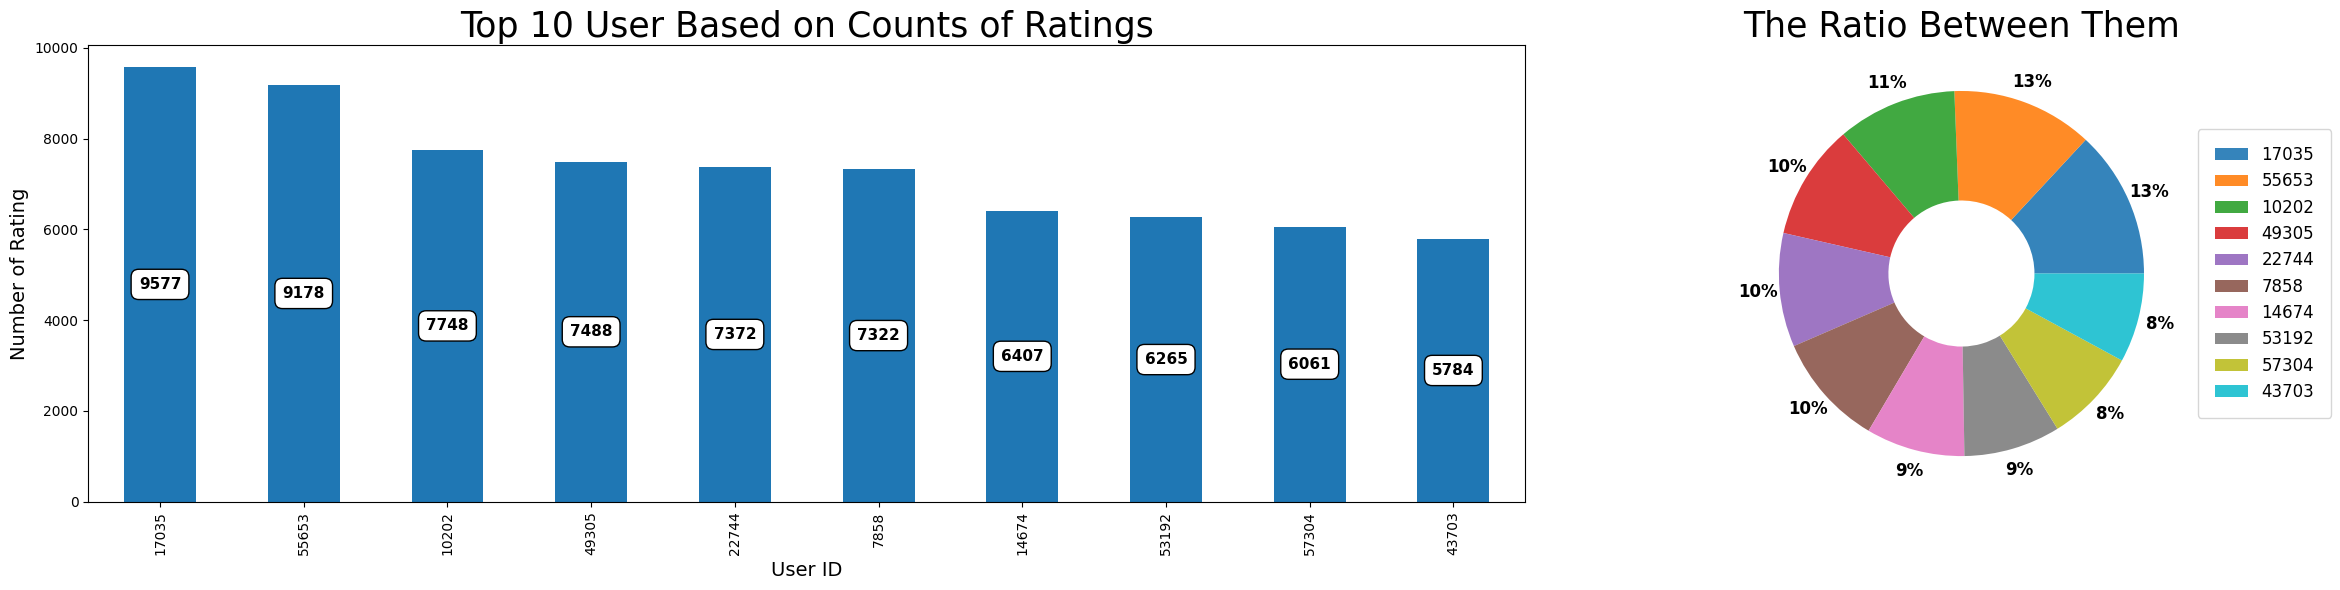

In [ ]:
fig, axes = plt.subplots(1,2)


ax = df_ratings['userId'].value_counts()[:10].plot.bar(ax= axes[0], figsize=(30,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height()/2),
                va="center", ha="center",
                size = 11, weight = 'bold', rotation = 0, color = 'black',
                bbox=dict(boxstyle="round,pad=0.5", fc='white'))

ax.set_xlabel('User ID', fontsize=14)
ax.set_ylabel('Number of Rating', fontsize=14)
axes[0].set_title('Top 10 User Based on Counts of Ratings', size= 25);

# Fix: Explicitly name columns after reset_index to avoid ambiguous 'count' columns
df_for_pie = df_ratings['userId'].value_counts()[:10].reset_index()
df_for_pie.columns = ['userId', 'count']

pie = plt.pie(
    df_for_pie['count'], # Now df_for_pie['count'] is a 1D Series
    wedgeprops=dict(width=0.6, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12,
    textprops={
        'fontsize': 12,
        'fontweight': 'bold'});

axes[1].legend(df_for_pie['userId'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), borderpad=1, fontsize=12)
axes[1].set_title('The Ratio Between Them', size= 25);

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()

<a name='rating_q5'></a>

### **5. Count of unique users per year**

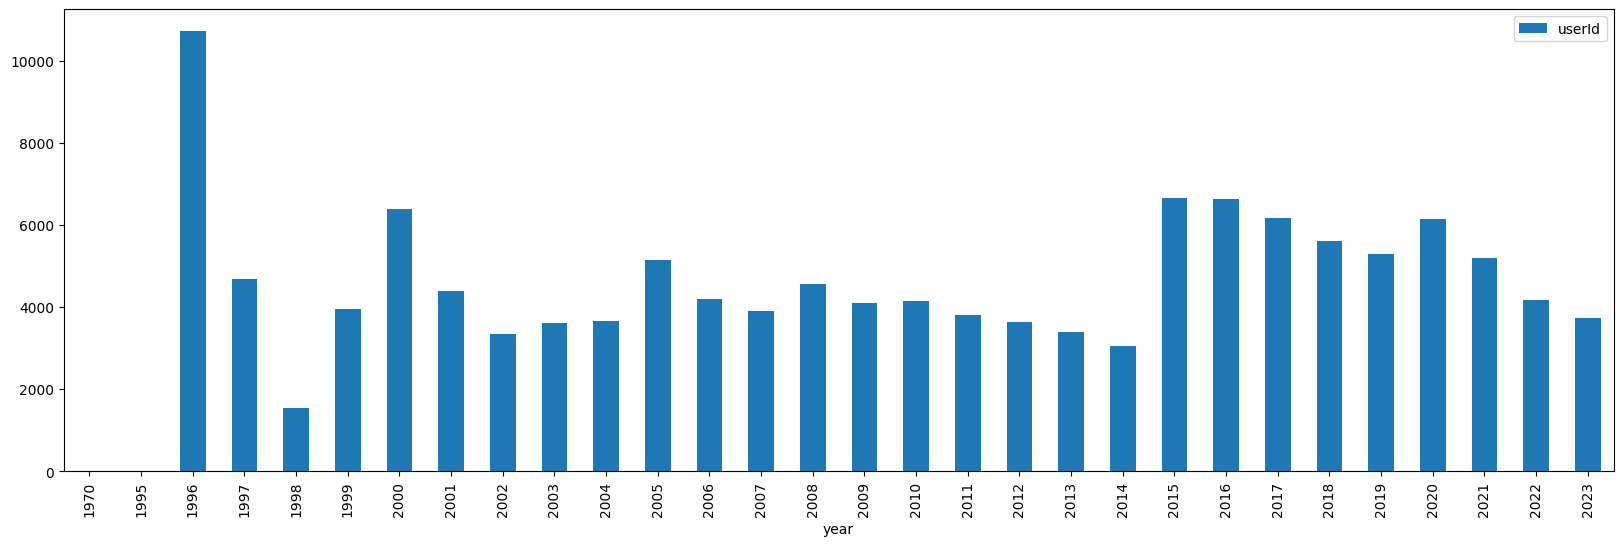

In [ ]:
df_temp = df_ratings[['year', 'userId']].groupby(['year']).nunique().reset_index()
df_temp.plot.bar(x='year', y='userId',figsize=(20,6));

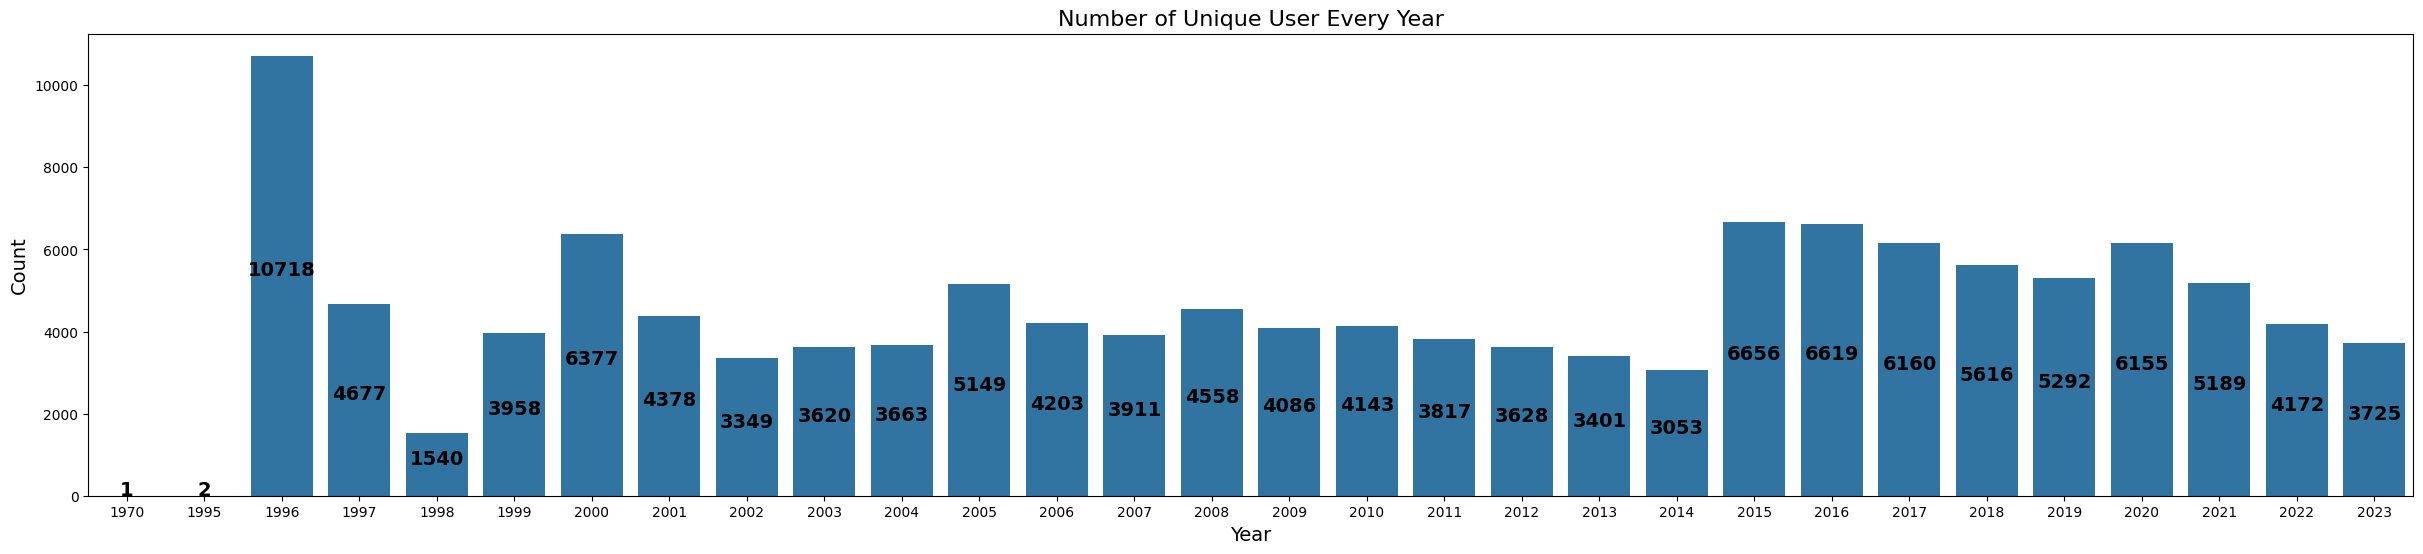

In [ ]:
df_temp = df_ratings[['year', 'userId']].groupby(['year']).nunique().reset_index()

plt.figure(figsize= (30, 6))
ax = sns.barplot(x = 'year', y = 'userId', data = df_temp);

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()),
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.title('Number of Unique User Every Year', fontsize=16);
plt.show()


<a name='rating_q6'></a>
### **6. Find the 10 Rated Movies and Counts**

/tmp/ipython-input-3384503102.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_sum["title"], rotation=60)
/tmp/ipython-input-3384503102.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_sum["title"], rotation=60)


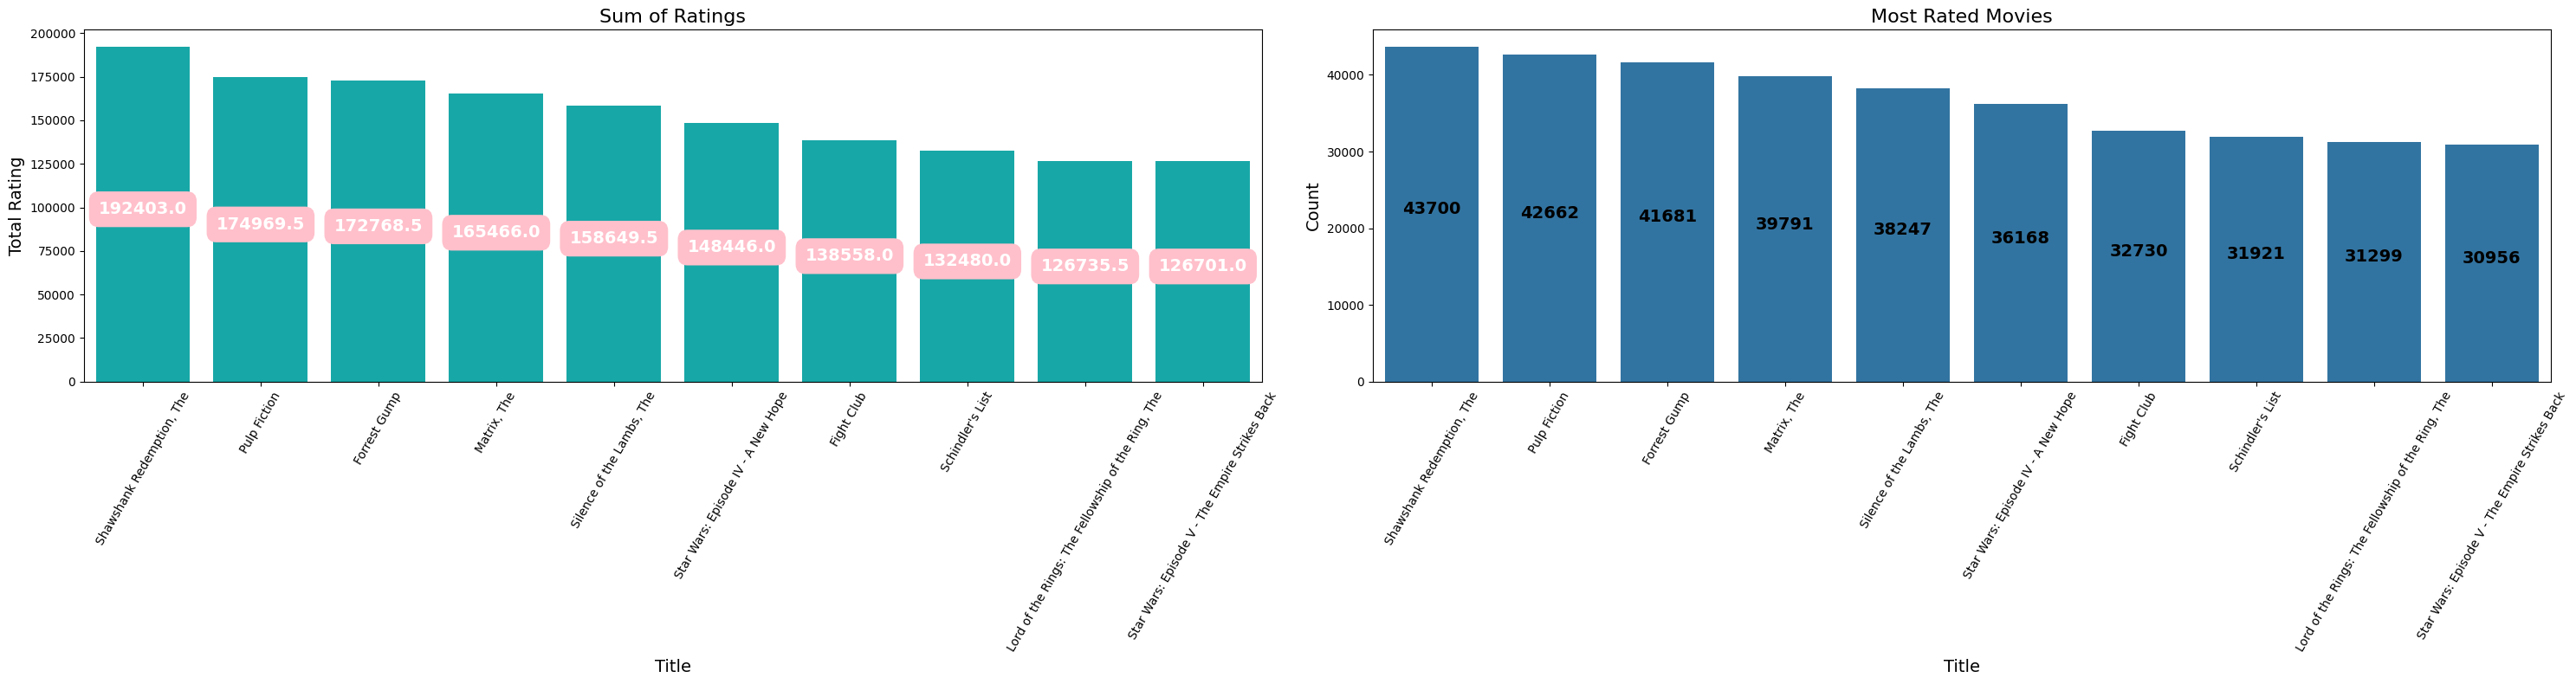

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (30, 8))

df_sum = df_ratings.groupby(['title', 'movieId']).sum(['Rating Mean']).sort_values('rating', ascending=False).reset_index().iloc[0:10,:]
ax= sns.barplot(ax = axs[0], x = 'title', y = 'rating', data = df_sum, color = 'c')
for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Total Rating', fontsize=14)
ax.set_xticklabels(df_sum["title"], rotation=60)
axs[0].set_title('Sum of Ratings', fontsize=16)

df = df_ratings.groupby(['title', 'movieId']).count().sort_values(by='rating',ascending=False).reset_index().iloc[0:10,:]
ax2= sns.barplot( x = 'title', y = 'userId', data = df)
for i in ax2.patches:
    ax2.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()),
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_sum["title"], rotation=60)

axs[1].set_title('Most Rated Movies', fontsize=16)

plt.tight_layout()
plt.show()

<a name='rating_q7'></a>

### **7. Top 10 Movies by Overall Rating (Sum of Rating/count of rating)**

In [ ]:
df_ra  = df_ratings.groupby(['title','movieId']).sum(['Rating Mean']).sort_values('rating', ascending=False).reset_index()
df_occ = df_ratings.groupby(['title','movieId']).count().sort_values(by='rating',ascending=False).reset_index()
df_ra = df_ra[['movieId','title','rating']]
df_occ = df_occ[['movieId','title','userId']]

/tmp/ipython-input-2039661043.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_overall["title"], rotation=60)
/tmp/ipython-input-2039661043.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_overall["title"], rotation=60)


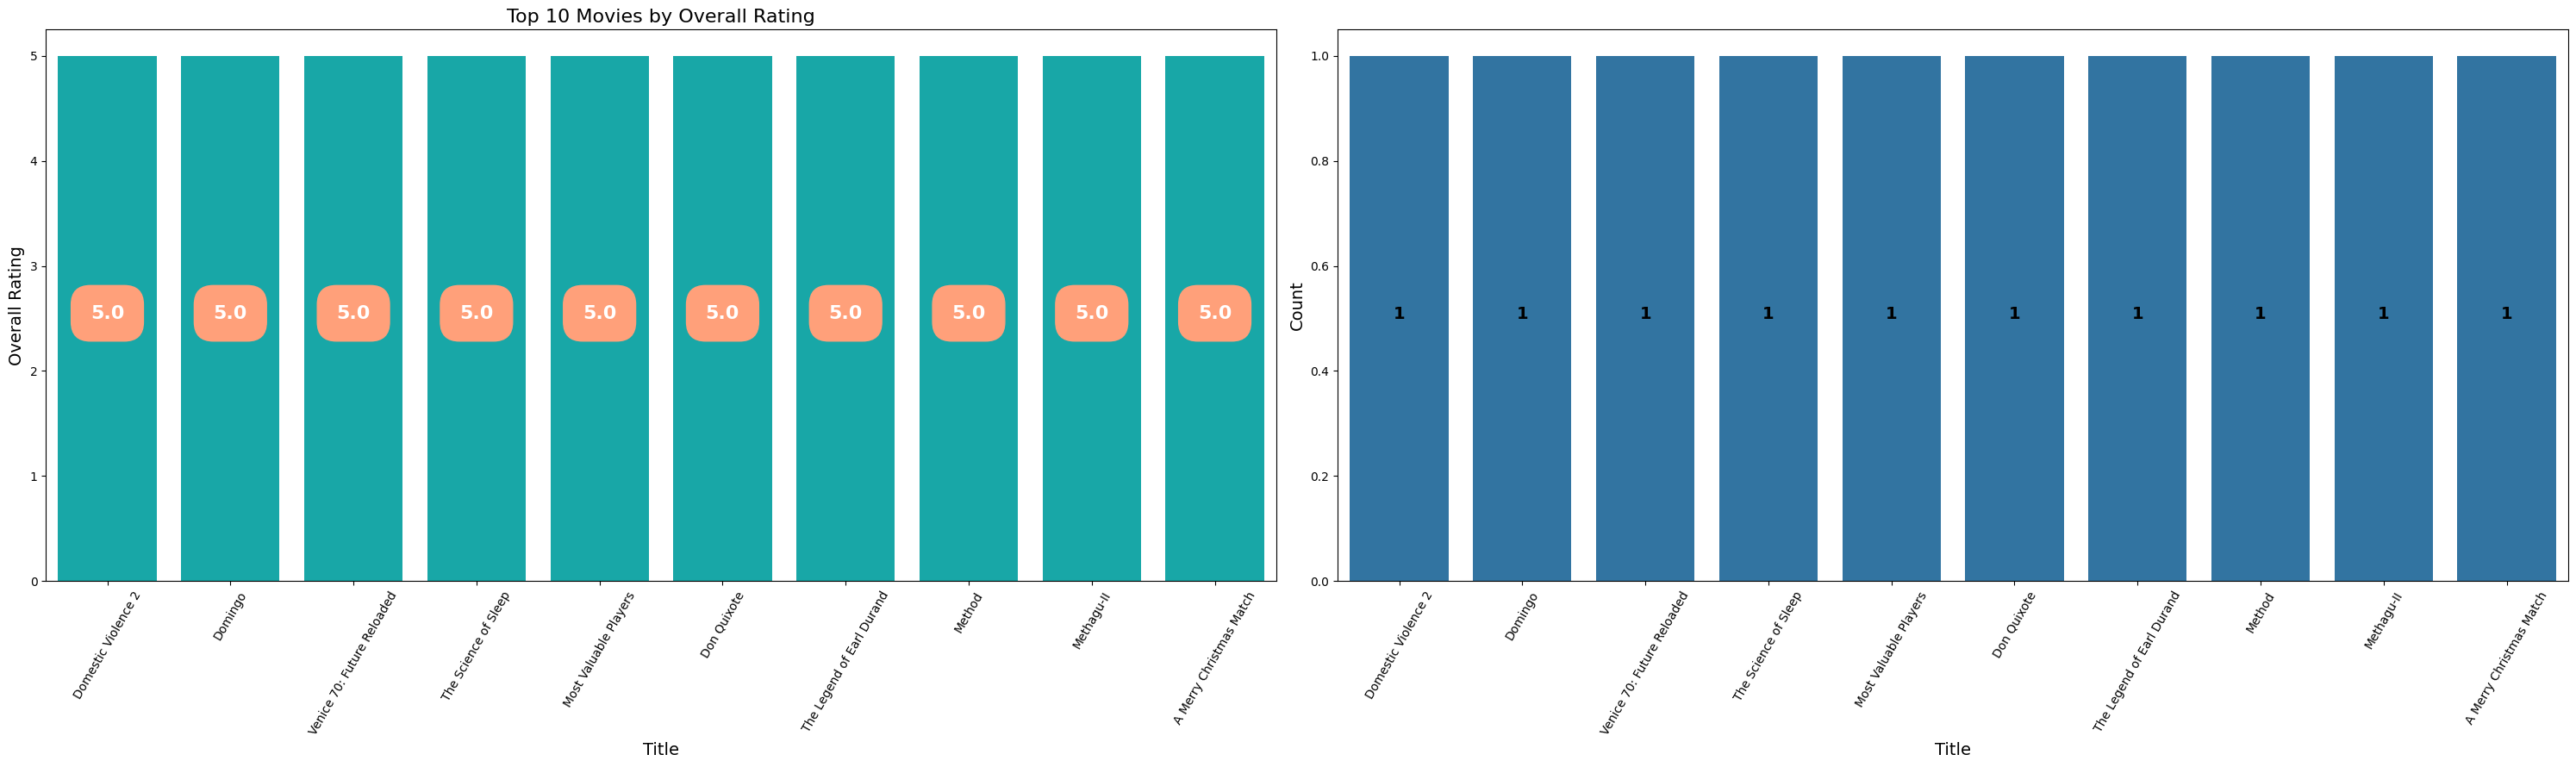

In [ ]:
df_temp = pd.merge(df_ra, df_occ, on=['movieId', 'title'], how='inner')
df_temp['Rating Score'] = df_temp['rating'] / df_temp['userId']
df_overall = df_temp.sort_values(by='Rating Score', ascending=False).reset_index().loc[0:9,:]

fig, axs = plt.subplots(1,2, figsize = (30, 9))

ax = sns.barplot( ax = axs[0], x = 'title', y = 'Rating Score', data = df_overall, color='c')
for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = round(i.get_height(), 2),
            ha = 'center', size = 16, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=1.0", fc='lightsalmon', ec='lightsalmon'))
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Overall Rating', fontsize=14)
ax.set_xticklabels(df_overall["title"], rotation=60)
axs[0].set_title('Top 10 Movies by Overall Rating', fontsize=16)


ax2= sns.barplot( x = 'title', y = 'userId', data = df_overall)
for i in ax2.patches:
    ax2.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()),
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_overall["title"], rotation=60)

plt.tight_layout()
plt.show()

<a name='rating_q8'></a>
### **8. Top 10 Movies by Overall Rating (With over 500 ratings count)**

/tmp/ipython-input-4063558991.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_overall["title"], rotation=60)
/tmp/ipython-input-4063558991.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_overall["title"], rotation=60)


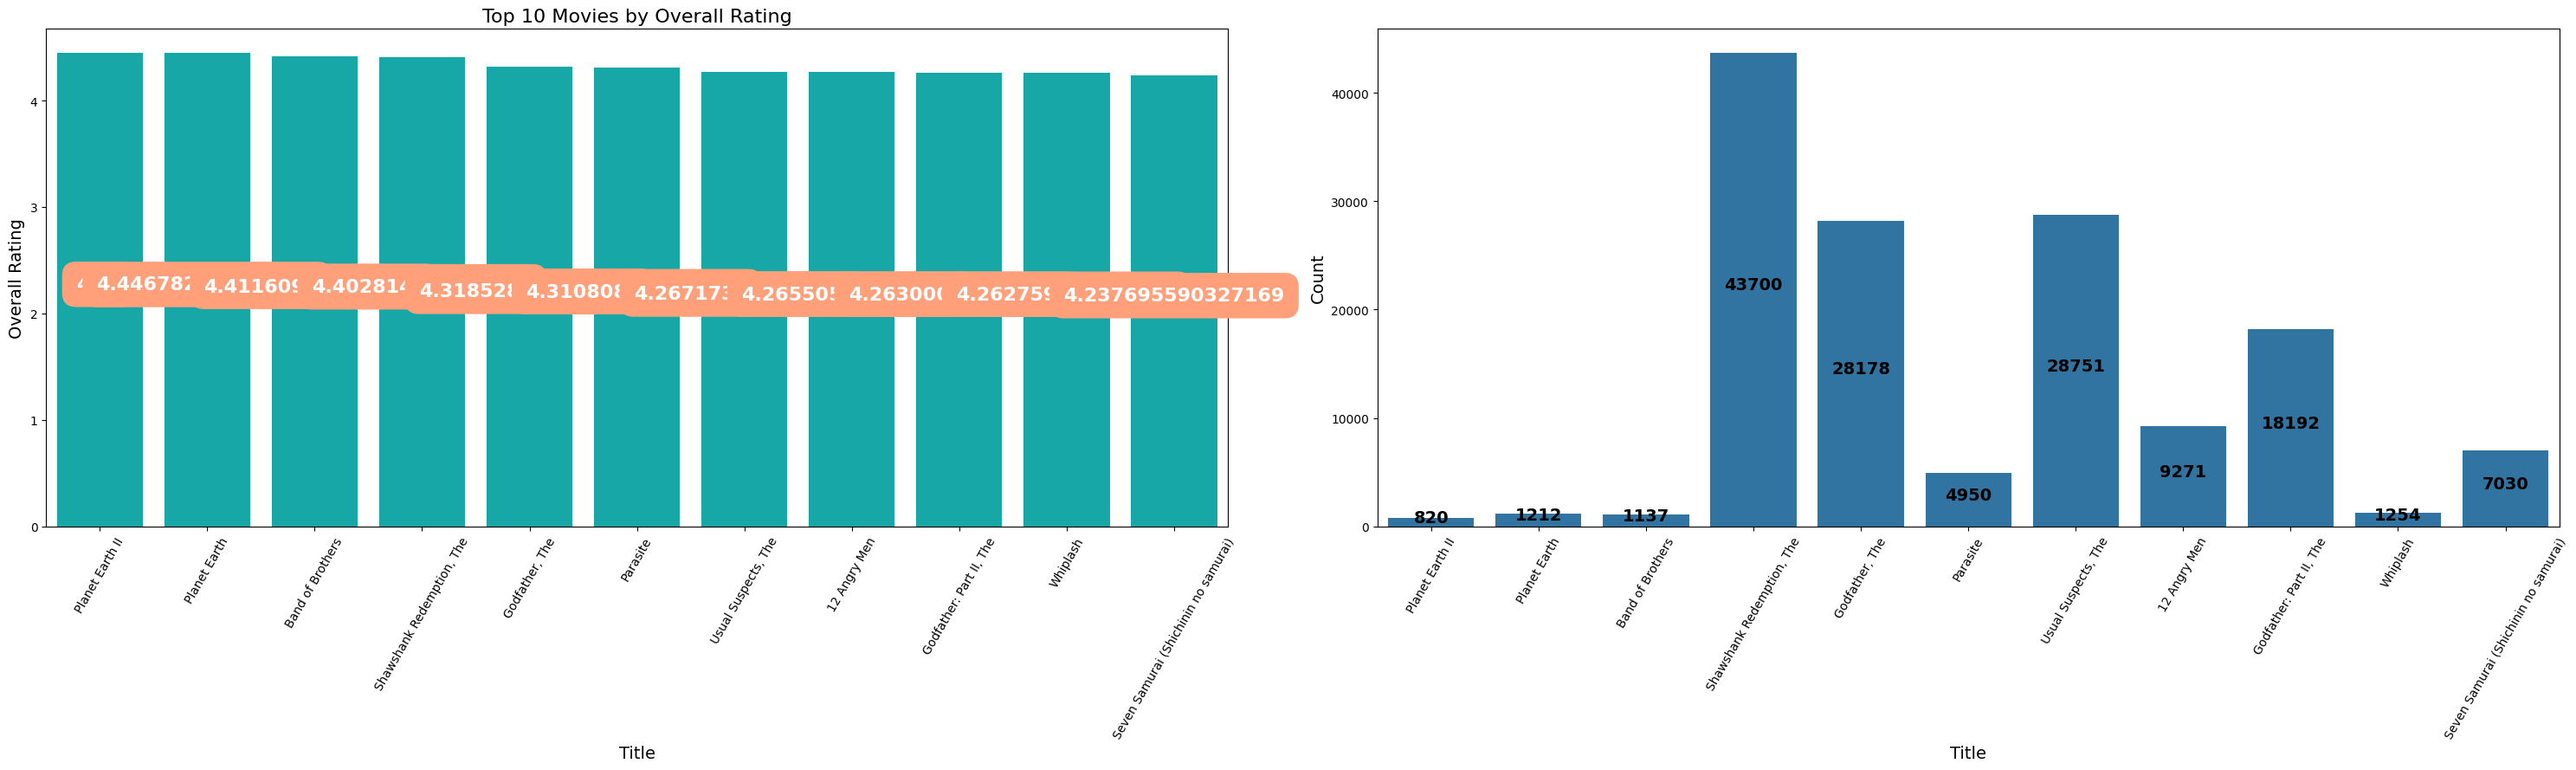

In [ ]:
df_overall = df_temp[df_temp['userId'] >500].sort_values(by='Rating Score',ascending=False).reset_index().loc[0:10,:]
fig, axs = plt.subplots(1,2, figsize = (30, 9))

ax = sns.barplot( ax = axs[0], x = 'title', y = 'Rating Score', data = df_overall, color='c')
for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = i.get_height(),
            ha = 'center', size = 16, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.7", fc='lightsalmon', ec='lightsalmon'))
ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Overall Rating', fontsize=14)
ax.set_xticklabels(df_overall["title"], rotation=60)
axs[0].set_title('Top 10 Movies by Overall Rating', fontsize=16)

ax2= sns.barplot( x = 'title', y = 'userId', data = df_overall)
for i in ax2.patches:
    ax2.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = int(i.get_height()),
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'black')
ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_overall["title"], rotation=60)

plt.tight_layout()
plt.show()